A little statistics
Now the main lab. Make a branch in git for lab #1; create a new notebook and add it to the branch (add, commit, push).

Converting a probability into a 'sigma'. As discussed in class, 'sigma' refers to a probability in physics. Our first task is to figure out how, given a probability, to calculate the assoicated 'sigma' value. The sigma implicitly refers to the standard normal distribution (a Gaussian with mean zero and stard deviation of 1). As we discussed in class, integrals of the standard normal distribution give probabilities.

A. Look up the Normal distribution and read about it. A few potential starting points: Math is fun, Wolfram, and a useful z table

B. As in class, try integrating the standard normal distribution. This can be done either with the erfc(), or calls to specific statistical cumulative probability distributions such as normcdf() in MatLab or stats.norm.cdf() in scipy. Try several values of sigma, and make sure you are getting values that match the z-table.

C. Now more often than not, we actually want to do the inverse: for a given probability determine the associated 'sigma' value: norminv() or erfcinv() in MatLab; stats.norm.ppf() in python. Try several probability values where you know what the answer should be (e.g. Probability associated with 1, 2, 5 sigma), and show that you get the right answer in terms of sigma.

D. If a minus sign appears, think about it and explain the meaning.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (15,10)

In [3]:
#From "A Little Statistics" Section of Lab1
#Item1, Part B, testing different sigma values and comparing to z-value table
sigma_test = stats.norm.cdf(1.8)
print(sigma_test)

sigma_test1 = stats.norm.cdf(1.3)
print(sigma_test1)

#values indeed match z-table

0.9640696808870742
0.9031995154143897


In [4]:
#From "A Little Statistics" Section of Lab1
#Item1, Parc C, testing different probabilities and comparing to sigma value

prob_test = stats.norm.ppf(sigma_test)
print(prob_test)
#result should print 1.8
prob_test1 = stats.norm.ppf(sigma_test1)
print(prob_test1)
#result should print 1.3

1.8000000000000003
1.3000000000000003


2.Now let's explore some other continuous analytic distributions. Following the pattern from your first HW assigment, make both the analytic pdf() and a realization with ~100k samples using a built-in distribution; but this time don't use the Gaussian. Choose one of the following distributions: Rayleigh; Lognormal; Chi-Squared or Gamma; Exponential. You and your partner should choose different distributions.

A. Read up on your distribution

B. Make plots (tweaking distribution and plot parameters as needed)

Commenting as Elijah: I will choose to examine the lognormal distribution

In [5]:
s=.75
log_dset = stats.lognorm.rvs(s,loc = 5., scale = .01, size = 100000)

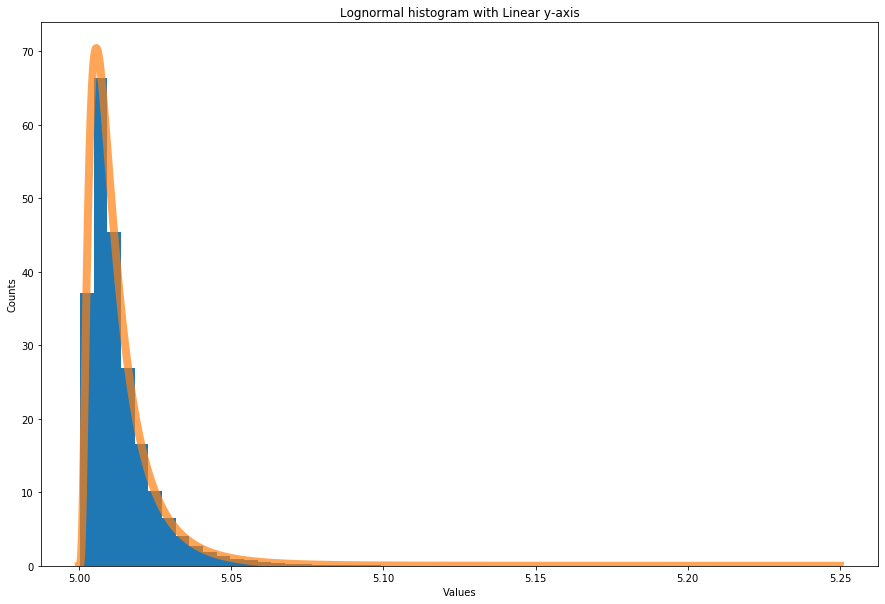

In [6]:
fig, ax = plt.subplots(1,1)
ax.hist(log_dset,50,density=True)
x = np.linspace(5.0,5.25,1000)
ax.plot(x,stats.lognorm.pdf(x,s,loc=5., scale = .01),linewidth = 8, alpha = 1.7)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Lognormal histogram with Linear y-axis')
plt.show()

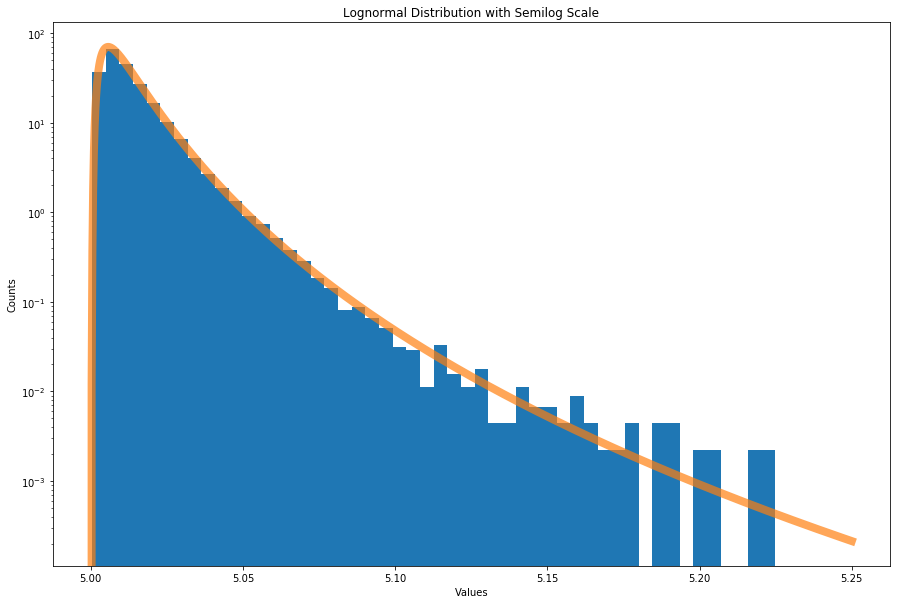

In [7]:
fig, ax = plt.subplots(1,1)
ax.hist(log_dset,50,density=True)
x = np.linspace(5.0,5.25,1000)
plt.yscale('log')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Lognormal Distribution with Semilog Scale')
ax.plot(x,stats.lognorm.pdf(x,s,loc=5., scale = .01),linewidth = 8, alpha = 2.7)
plt.show()

3.Imagine that your signal-free data follows the distribution you have chosen; and you have a measurement for which you need to determine the 'sigma'

A. Select a value for your hypothetical measurement

B. Clearly state the statistical question you want to ask in words

C. Convert your word question into a mathematical integral

D. Use the math to calculate the probability that the background produced the signal (Hint: you will want to use the statistics 
functions to do the integrals. cdf() and icdf() in MatLab; .cdf() and .ppf() in scipy).

E. Convert your probability into an equivalent 'sigma'

Part 3, Item A
I will select my value to be 5.1

Part3, Item B
The question then becomes: what sigma value from a normal data distribution would give the same probability when looking
for the probability that you detect a signal that has a value of 5.1 or greater?\

Part3, Item C
First, you take the integral of the lognormal distribution from the selected value (5.1) to infinity to find that
probability.

Next, you take an integral from an unknown sigma value to infinity under the assumption of a normal distribution of data. 
Given the answer to the first integral, you will be able to compute the sigma value.

In [40]:
#Part3, Item D, and Item E

logprob = stats.lognorm.cdf(5.1,s, loc=0, scale=1)
print("This number represents the probability of detecting a signal greater than 5.1 in the lognormal distribution")
print()
print(1-logprob)
print()

logsig = stats.norm.ppf(1-logprob,loc=0,scale=1)
print("This number represents the sigma required to get the same probability if the data were normally distributed")
print("It is negative because the probability is so small, and you assume +infinity is the upper integral bound,")
print("which means you must come past zero to arrive at the sigma value that will encompass enough data.")
print()
print(logsig)

This number represents the probability of detecting a signal greater than 5.1 in the lognormal distribution

0.01491574013027852

This number represents the sigma required to get the same probability if the data were normally distributed
It is negative because the probability is so small, and you assume +infinity is the upper integral bound,
which means you must come past zero to arrive at the sigma value that will encompass enough data.

-2.172320719640373


Part4 I am going to do after this lab, just so I can get through all the work before the lab is over.

4.Now explore a little bit. Try various hypothetical measurement values and see how the probabilities and 'sigmas' change. Discuss the patterns that you see.

       As you move your chosen signal value closer to the left side of the data, in other words including more data in the initial integral, the probability goes toward 1, and the sigma goes toward infinity. 
       In the reverse case, as you move the chosen signal value to the right side of the data, encompassing less and less, the sigma value goes toward negative infinity, which is to be expected.

For the non-continuous section of the lab, I will be examining the binomial distribution

In [19]:
n,p = 9,.5
binom_dset = stats.binom.rvs(n,p, size = 100000)
binom_dset1 = stats.binom.rvs(n,.1, size = 100000)
binom_dset2 = stats.binom.rvs(n,.9, size = 100000)
print(binom_dset)

[4 5 4 ... 8 5 5]


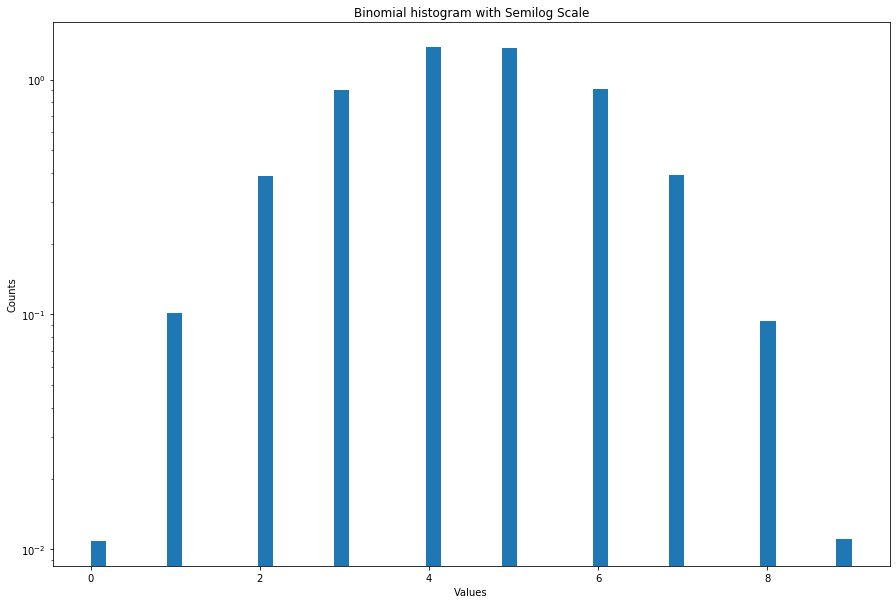

In [31]:
fig, ax = plt.subplots(1,1)
ax.hist(binom_dset,50,density=True)
x = np.linspace(0,10,1000)
#ax.plot(x,stats.binom.pmf(x,n=10,p=.5,loc=5.),linewidth = 8, alpha = 1.7)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Binomial histogram with Semilog Scale')
plt.show()

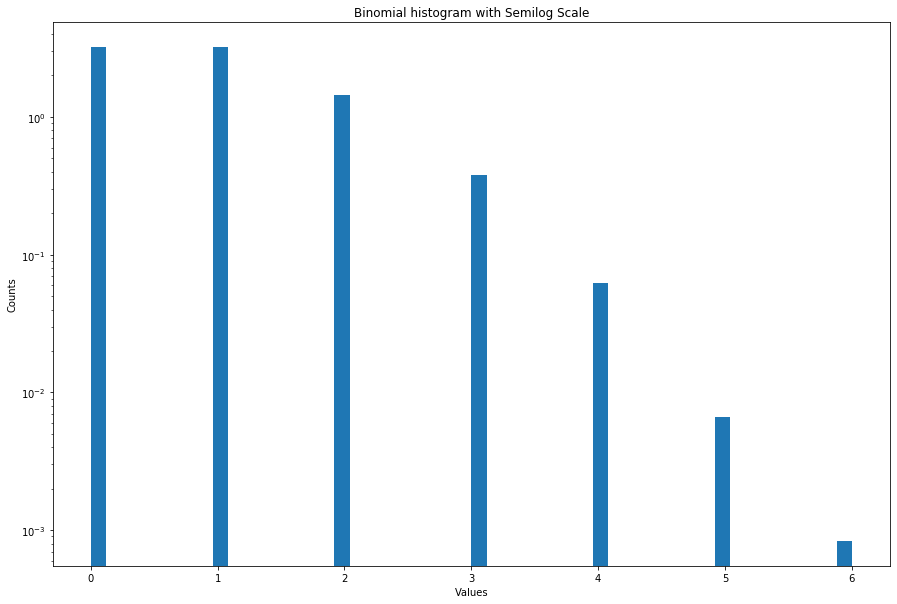

In [29]:
fig, ax = plt.subplots(1,1)
ax.hist(binom_dset1,50,density=True)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Binomial histogram with Semilog Scale')
plt.show()

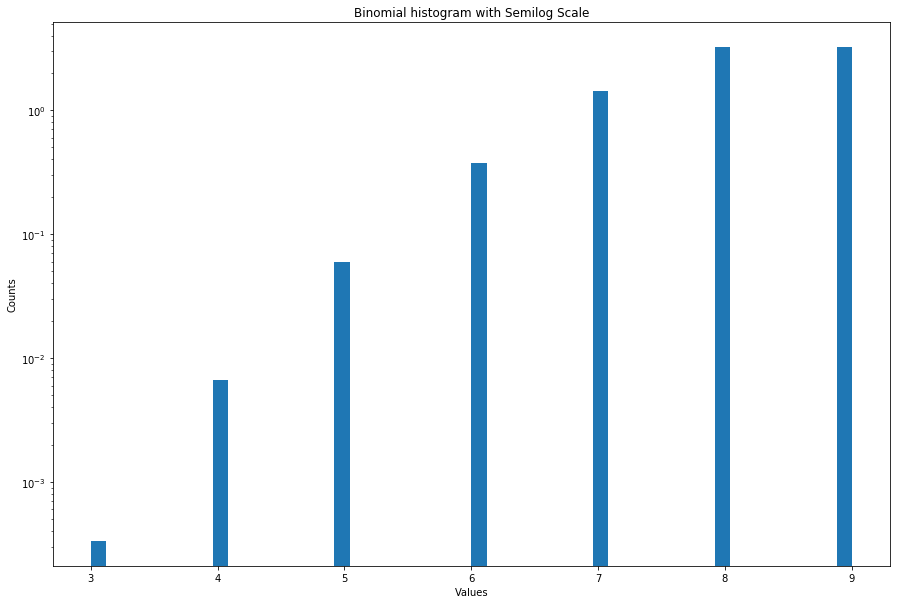

In [30]:
fig, ax = plt.subplots(1,1)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Binomial histogram with Semilog Scale')
ax.hist(binom_dset2,50,density=True)
plt.show()

The binomial distribution I will examine further will be the first graph, the distribution that gives equal probability to any particular value.
This way, a Gaussian distribution has essentially been created.
Because of this, I will choose my value of interest to be 5, and my statistical question would be the following: what sigma value from a normal data distribution would give the same probability when looking for the probability that you detect a signal that has a value greater than 5 on the binomial distribution dataset.

In [13]:
#need to figure out how cdf works for binomial distribution, then I should be all set. Clean things up a bit, do some
#writing, and this lab report will be good to send off.
n=10
p=.5
binprob = stats.binom.cdf(5,n,p,loc=0)
print("This number represents the probability of receiving a signal greater than 5.")
print("Since this is a discrete distribution, that effectively means any integer that is 6 or greater.")
print()
print(1-binprob)

binsig = stats.binom.ppf(1-binprob,n,p,loc=0)
print()
print("This number represents the sigma value that would give an equal probability if the data was noramlly distributed.")
print()
print(binsig)

This number represents the probability of receiving a signal greater than 5.
Since this is a discrete distribution, that effectively means any integer that is 6 or greater.

0.3769531250000001

This number represents the sigma value that would give an equal probability if the data was noramlly distributed.

4.0


D. Because the distributions are discrete, so are the probabilities and 'sigmas'. Think about this and discuss the implications for experiments.

    Given that the distribution is discrete, and thus the sigma values must be too, this implies that you should be able to analyze the data with greater certainty, because if the values for sigma and the probability don't match known discrete values, there must be a problem with the data.

E. While the results are discrete, the parameters of the distributions are not. For example, the mean of a Poisson distribution can be 9.2. Think about and explain why this makes sense and what changes continuously and what doesn't.

    Discrete distributions can and most likely will produce parameters that are not discrete simply because of the way the numbers can be manipulated. To look at the example described above, and Poisson distribution can have a mean that is not a discrete value because it takes the sum of n integers and divides them by n. To further communicate this idea, think of a discrete distribution comprised of 3 values, 9, 7, and 6, their sum is 22 and 22 divided by 3 is 7.33333, in othe words, not a discrete value. So the data, sigma, and probilities will all be confined to discrete values, and things like the mean, and standard deviation will be continuous. 